In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold

In [212]:
j = 10
k = 10

features = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_features.csv')
pct = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_pct.csv')

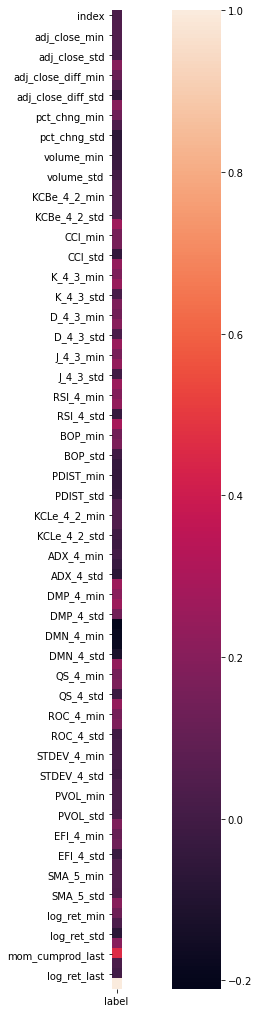

In [213]:
corr = features.corr() 
fig, ax = plt.subplots(figsize = (18, 18)) 
sns.heatmap(corr[['label']], square=True) 

In [214]:
correlated_features = set()
for i in range(len(corr.columns)):
    for a in range(i):
        if abs(corr.iloc[i, a]) > 0.90:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [215]:
num_colums = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(features.select_dtypes(include=num_colums).columns)
df = features[numerical_columns]
df

index  adj_close_mean  adj_close_min  adj_close_max  adj_close_std  \
0        0     1136.777327    1091.760010    1150.229980      15.081346   
1        1     1091.051426    1073.869995    1103.319946       9.724233   
2        2     1074.803331    1056.739990    1097.280029      14.249722   
3        3     1103.662012    1094.869995    1109.170044       6.191079   
4        4     1108.627767    1094.599976    1122.969971      10.650013   
..     ...             ...            ...            ...            ...   
402    402     3840.132031    3798.909912    3855.360107      23.651921   
403    403     3805.967801    3714.239990    3871.739990      52.409185   
404    404     3908.795724    3886.830078    3934.830078      17.095568   
405    405     3909.700021    3876.500000    3932.590088      22.990007   
406    406     3834.008759    3768.469971    3901.820068      39.719069   

     adj_close_diff_mean  adj_close_diff_min  adj_close_diff_max  \
0              -2.944999          -24.719971           14.199951   
1               1.089986          -12.969971           15.319946   
2              -2.721252          -34.170044           13.780029   
3               3.285004           -1.160034            7.239990   
4               3.546249           -2.300049           11.219971   
..                   ...                 ...                 ...   
402            14.112549          -11.600098           52.940186   
403             2.764984          -98.850098           59.620117   
404             8.000000           -4.360107           28.760010   
405            -1.193359          -30.209961           44.059814   
406             1.799979          -51.250000           90.670166   

     adj_close_diff_std  pct_chng_mean  ...  SMA_5_std  log_ret_mean  \
0             11.504507      -0.002423  ...   4.731755     -0.002471   
1             12.318654       0.000896  ...   0.673109      0.000849   
2             14.728086      -0.002151  ...   4.365267     -0.002227   
3              3.558300       0.002393  ...   0.000000      0.002386   
4              4.937411       0.002855  ...   6.100350      0.002843   
..                  ...            ...  ...        ...           ...   
402           27.898588       0.002972  ...   0.000000      0.002950   
403           59.098503       0.000731  ...   9.553497      0.000637   
404           13.012541       0.001759  ...   5.915260      0.001753   
405           25.395870      -0.000245  ...   5.297419     -0.000260   
406           57.886608       0.000497  ...   5.260747      0.000411   

     log_ret_min  log_ret_max  log_ret_std  cumprod_last  mom_cumprod_last  \
0      -0.022390     0.012422     0.009865     -0.036390          0.243343   
1      -0.011888     0.014165     0.010345      0.005963          0.007389   
2      -0.031636     0.012956     0.012831     -0.019840         -0.043279   
3      -0.001046     0.006563     0.003097      0.012001          0.000000   
4      -0.002083     0.010107     0.004313      0.025918         -0.021017   
..           ...          ...          ...           ...               ...   
402    -0.003015     0.013839     0.006524      0.014860          0.044117   
403    -0.026013     0.015924     0.014617      0.005746         -0.017804   
404    -0.001114     0.007372     0.003137      0.012349          0.063108   
405    -0.007763     0.011288     0.005943     -0.001821          0.022329   
406    -0.013508     0.023512     0.013981      0.003290         -0.092761   

     rev_cumprod_last  log_ret_last  label  
0           -0.159836     -0.022390    1.0  
1            0.018856      0.012890    0.0  
2           -0.025423     -0.002748    0.0  
3            0.000000     -0.001046    0.0  
4           -0.008854      0.003729    0.0  
..                ...           ...    ...  
402         -0.011486      0.003609    1.0  
403         -0.004672      0.010795    0.0  
404          0.054149      0.004700    1.0  
405         -0.033275      0.011288

In [216]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), 
                                                    df['label'], train_size=0.33)
X_before = X_test


X_train.drop(columns=correlated_features, axis=1, inplace=True)
X_test.drop(columns=correlated_features, axis=1, inplace=True)


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

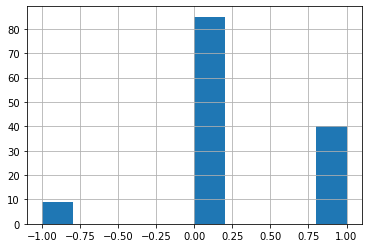

In [217]:
y_train.hist()

In [218]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0,intercept_scaling=1,   
               dual=True, fit_intercept=True, penalty='l2'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
clf.fit(X_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [219]:
predictions = clf.predict(X_test)
predictions

array([ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0., -1.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  1.,  0., -1.,  0.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  0., -1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
       -1., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0., -1.,  1.,  0.,  0

In [220]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        25
         0.0       0.73      0.78      0.75       155
         1.0       0.75      0.76      0.76        93

    accuracy                           0.70       273
   macro avg       0.49      0.51      0.50       273
weighted avg       0.67      0.70      0.69       273



In [221]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-Validation Accuracy Scores [0.42857143 0.71428571 0.64285714 0.64285714 0.69230769 0.76923077
 0.76923077 0.61538462 0.61538462 0.76923077]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [222]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.42857142857142855, 0.6659340659340658, 0.7692307692307693)

In [223]:
X_before['label'] = predictions.tolist()

In [229]:
performance =pct[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']].infer_objects()
performance['date'] = pd.to_datetime(performance['date'])
# output = date.merge(performance, how='right',left_index=True, right_index=True)[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']]
# output
# output.to_csv(csv_)
performance = performance.set_index('date')
performance = performance.merge(X_before[['label']], left_on='index', right_index=True) #example
performance['test_pct_change'] = performance.apply(lambda x: x['mom_pct_change'] if x['label']==1 else x['rev_pct_change'] if x['label']==-1 else 0,axis=1) # todo build more models and get their outputs. output results here

performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: (x+1).cumprod()-1)*100
#performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: np.log(1 + x).cumsum())
performance
performance[['mom_return_diff','rev_return_diff', 'test_return_diff']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].diff()
performance['mom_sharpe_ratio'] = performance['mom_return'].mean()/performance['mom_return'].std() * np.sqrt(252)

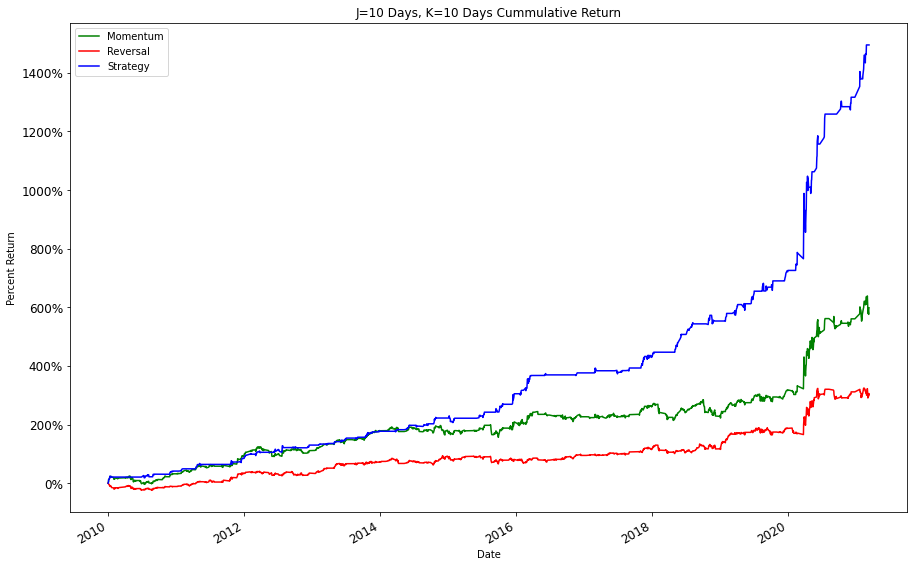

In [230]:
import matplotlib.ticker as mtick

plt = performance[['mom_return','rev_return', 'test_return']].plot(figsize=(15,10),title='J={0} Days, K={1} Days Cummulative Return'.format(j,k),xlabel="Date",ylabel="Percent Return",fontsize=12,color=['green','red','blue'])
plt.legend(['Momentum','Reversal','Strategy'])
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
plt.yaxis.set_major_formatter(xticks)
plt.get_figure().savefig('performance_j{0}_k{1}.png'.format(j,k))

index  mom_pct_change  rev_pct_change  SP500_pct_change  label  \
date                                                                         
2010-01-04    0.0        0.000000        0.000000          0.016043    1.0   
2010-01-05    0.0        0.027465       -0.004083          0.003116    1.0   
2010-01-06    0.0        0.023555       -0.018759          0.000546    1.0   
2010-01-07    0.0        0.073832       -0.004437          0.004001    1.0   
2010-01-08    0.0       -0.000327       -0.015054          0.002882    1.0   
...           ...             ...             ...               ...    ...   
2021-03-04  406.0       -0.033995       -0.035124         -0.013417    0.0   
2021-03-05  406.0        0.018725        0.026945          0.019496    0.0   
2021-03-08  406.0       -0.024634       -0.010595         -0.005359    0.0   
2021-03-09  406.0        0.029765        0.022494          0.014155    0.0   
2021-03-10  406.0        0.003339       -0.007819          0.006030    0.0   

            test_pct_change  mom_return  rev_return  test_return  \
date                                                               
2010-01-04         0.000000    0.000000    0.000000     0.000000   
2010-01-05         0.027465    2.746488   -0.408348     2.746488   
2010-01-06         0.023555    5.166729   -2.276590     5.166729   
2010-01-07         0.073832   12.931419   -2.710152    12.931419   
2010-01-08        -0.000327   12.894454   -4.174777    12.894454   
...                     ...         ...         ...          ...   
2021-03-04         0.000000  580.110997  290.715205  1495.003300   
2021-03-05         0.000000  592.846067  301.242905  1495.003300   
2021-03-08         0.000000  575.778398  296.991884  1495.003300   
2021-03-09         0.000000  595.892662  305.921744  1495.003300   
2021-03-10         0.000000  598.216118  302.747805  1495.003300   

            mom_return_diff  rev_return_diff  test_return_diff  \
date                                                             
2010-01-04              NaN              NaN               NaN   
2010-01-05         0.027465        -0.004083          0.027465   
2010-01-06        -0.003909        -0.014676         -0.003909   
2010-01-07         0.050277         0.014322          0.050277   
2010-01-08        -0.074160        -0.010618         -0.074160   
...                     ...              ...               ...   
2021-03-04        -0.005175        -0.011366          0.000000   
2021-03-05         0.052720         0.062069          0.000000   
2021-03-08        -0.043359        -0.037539          0.000000   
2021-03-09         0.054399         0.033088          0.000000   
2021-03-10        -0.026426        -0.030313          0.000000   

            mom_sharpe_ratio  
date                          
2010-01-04         25.017145  
2010-01-05         25.017145  
2010-01-06         25.017145  
2010-01-07         25.017145  
2010-01-08         25.017145  
...                      ...  
2021-03-04         25.017145  
2021-03-05         25.017145  
2021-03-08         25.017145  
2021-03-09         25.017145  
2021-03-10         25.017145  

[1897 rows x 13 columns]